In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data.metrics import get_metrics

In [3]:
df = pd.read_json("../reports/embed_level_weights.jsonl", lines=True)
metrics = ['top_1_accuracy', "top_5_accuracy", 'macro_f1']
get_metrics(df, metrics)

In [4]:
hparams = ["model_cls", "embedding_weight_factor", "embedding_type"]
dfm = df.groupby(hparams)[
    metrics
].agg(["mean", "std"]).reset_index()


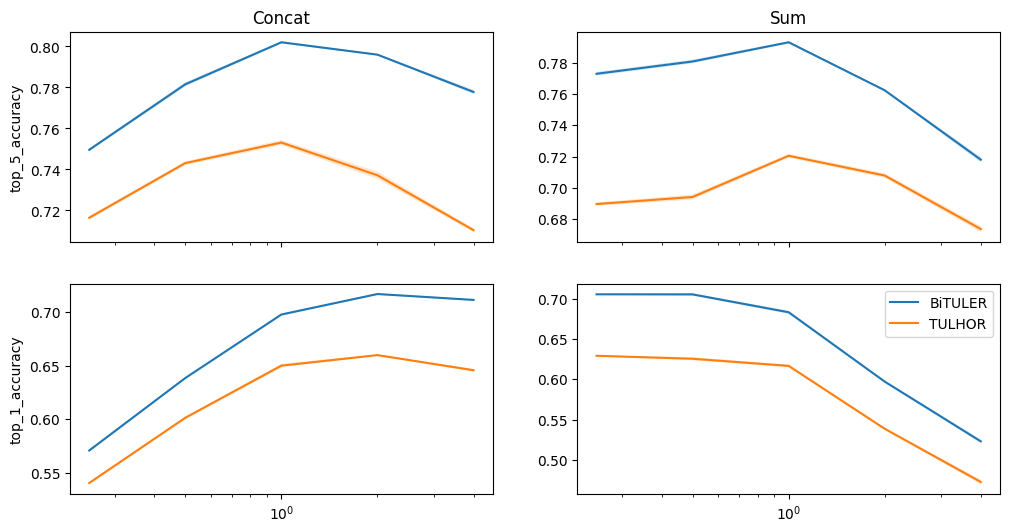

In [10]:
dfp = dfm

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 6), sharey=False, sharex=True)
for row_idx, metric in enumerate(['top_5_accuracy', "top_1_accuracy"]):
    axs_row = axs[row_idx] 
    axs_row[0].set_ylabel(metric)
    for ax, (emb_type, df_col) in zip(axs_row, dfp.groupby("embedding_type")):
        if row_idx == 0:
            ax.set_title(emb_type.split('lookup_')[1].capitalize())
        for model, df_line in df_col.groupby("model_cls"):
            x = df_line["embedding_weight_factor"]
            y = df_line[(metric, "mean")]
            std = df_line[(metric, 'std')]
            ax.plot(x, y, label=model)
            ax.fill_between(x, y-std, y+std, alpha=0.2)

        ax.set_xscale("log")
ax.legend()